In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd

In [142]:
# sitios  = pd.read_csv(r"C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\training_sites_points_raster_value.csv", encoding = 'ISO-8859-1', index_col = [0], sep = ";")


In [13]:
sitios  = pd.read_csv(r"C:\Users\crist\Documents\GitHub\land_use_classification\sitios_entrenamiento_2021_lingue_reflex.csv", encoding = 'ISO-8859-1', index_col = [0], sep = ",")
sitios


,categoria,descrpcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1.0,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1.0,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1.0,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1.0,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1.0,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
684,NaN,NaN,6.0,POINT (-73.15821942536273 -39.451965724074356),0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,NaN,NaN,6.0,POINT (-73.14340176972097 -39.45305711564692),0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,NaN,NaN,6.0,POINT (-73.20807053264092 -39.44553718808514),-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,NaN,NaN,6.0,POINT (-73.18515348804354 -39.447118725573525),0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


In [14]:
# Verificamos na
sitios.isna().sum()

categoria     587
descrpcion    677
id_clase        2
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

In [15]:
sitios = sitios.dropna(subset = ['id_clase'])
sitios.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

In [16]:
sitios_num = sitios.iloc[:,-7:]

# Machine Learning Clasification

In [17]:
sitios_num

,B1,B2,B3,B4,B5,B6,B7
0,0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...
684,0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


# Debemos separar entre las etiquetas y los datos

In [23]:
# Separamos entre etiquetas y los datos
labels = sitios.loc[:,'id_clase']
features = sitios.loc[:,['B1','B2','B3','B4','B5','B6','B7']]

In [24]:
X_train,X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.25, random_state = 42)

In [25]:
## Partimos por lo simple
dt = DecisionTreeClassifier(criterion= 'gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
dt.feature_importances_


array([0.09662138, 0.25181986, 0.32520273, 0.19975679, 0.10849528,
       0.01810396, 0.        ])

In [29]:
features_names = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']

In [30]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
dt.max_features_

7

In [32]:
## Validacion

y_pred = dt.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, y_pred)

In [34]:
confusion

array([[43,  3,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0, 15]], dtype=int64)

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)

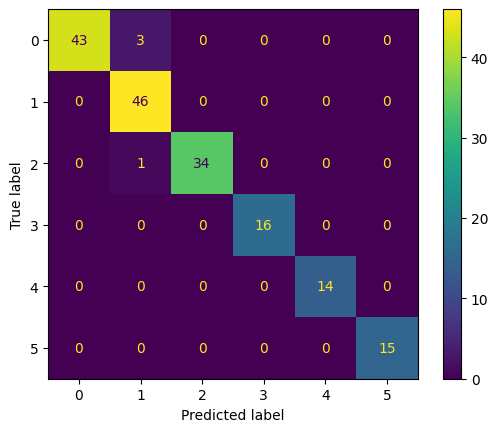

In [36]:
disp.plot()

## Buscando los hiperparametros.

In [38]:
param_distribution = {
    "n_estimators": [10,20,50,70,100],
    "max_features": ["sqrt","log2",None],
    "max_depth": [None, 10,20,30],
    "min_samples_split" : [2,4,8,10],
    "min_samples_leaf" : [1,2,4],
    "bootstrap" : [True, False]
}

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [40]:
X_train # Can we transform this in a array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()


In [41]:
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

In [42]:
print(f'shape xtrain are {X_train.shape} and shape array X_train_array is {X_train_array.shape}')

shape xtrain are (515, 7) and shape array X_train_array is (515, 7)


In [43]:
X_train.iloc[1,:]

B1    0.063780
B2    0.070737
B3    0.092875
B4    0.102637
B5    0.109045
B6    0.130852
B7    0.117928
Name: 646, dtype: float64

In [44]:
X_train_array[1,:]

array([0.06378  , 0.0707375, 0.092875 , 0.1026375, 0.109045 , 0.1308525,
       0.1179275])

In [45]:
# Iniciamos el clasificador vacio

rfc = RandomForestClassifier(random_state = 42)
search = RandomizedSearchCV(rfc, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [46]:
# Iniciamos el clasificador vacio

rfc_np = RandomForestClassifier(random_state = 42)
search_np = RandomizedSearchCV(rfc_np, param_distribution, n_iter = 10, cv = 5, random_state = 42)
search_np.fit(X_train_array,y_train_array)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

In [47]:
search.best_estimator_

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [48]:
search_np.best_estimator_

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [49]:
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [50]:
best_model_np = search_np.best_estimator_
best_model_np

RandomForestClassifier(max_features=None, n_estimators=20, random_state=42)

In [51]:
best_params = search.best_params_
best_params

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

In [52]:
best_params_np = search_np.best_params_
best_params_np

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': None,
 'bootstrap': True}

In [53]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report 

In [54]:
print(classification_report(y_train,search.predict(X_train)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       146
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       111
         4.0       1.00      1.00      1.00        46
         5.0       1.00      1.00      1.00        55
         6.0       1.00      1.00      1.00        26

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



In [55]:
print(classification_report(y_test_array,search_np.predict(X_test_array)))

              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        46
         2.0       0.90      1.00      0.95        46
         3.0       1.00      0.97      0.99        35
         4.0       1.00      0.94      0.97        16
         5.0       0.93      1.00      0.97        14
         6.0       1.00      0.93      0.97        15

    accuracy                           0.97       172
   macro avg       0.97      0.96      0.97       172
weighted avg       0.97      0.97      0.97       172



In [56]:
print(classification_report(y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       146
         2.0       1.00      1.00      1.00       131
         3.0       1.00      1.00      1.00       111
         4.0       1.00      1.00      1.00        46
         5.0       1.00      1.00      1.00        55
         6.0       1.00      1.00      1.00        26

    accuracy                           1.00       515
   macro avg       1.00      1.00      1.00       515
weighted avg       1.00      1.00      1.00       515



# vamos a hacer las predicciones a partir del modelo entrenadao con los puntos de entrenamiento

In [42]:
import rasterio 

In [43]:
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt


import geopandas as gpd

Cargamos la informacion de la imagen satelital

In [49]:
# full_dataset = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_7b_ord.tif')
full_dataset= rasterio.open(r'F:\Respaldo toshiba\projectos\Lingue\composite_2021_summer_lingue.tif')


In [50]:
training_sites = gpd.read_file(r'F:/Respaldo toshiba/projectos/Lingue/sitios_entrenamientos_lingue.gpkg', layer = 'sitios_entranamientos_lingue')


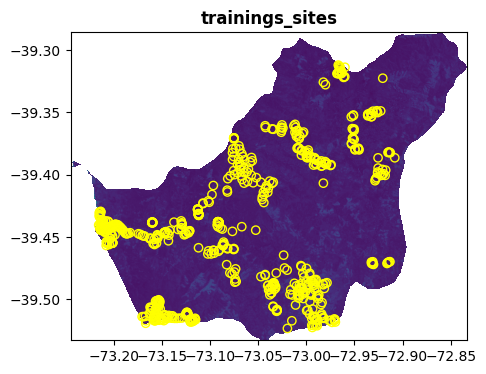

In [53]:
fig, ax1 = plt.subplots(figsize = (10,4))
show(full_dataset, ax = ax1, title = "trainings_sites")
training_sites.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
plt.show()

In [57]:
img_rows, img_cols = full_dataset.shape
print(img_rows,img_cols)
img_bands = full_dataset.count
print(full_dataset.count)

NameError: name 'full_dataset' is not defined

In [55]:
# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X_train_array.shape))
print('Our y array is sized: {sz}'.format(sz=y_train_array.shape))

Our X matrix is sized: (515, 7)
Our y array is sized: (515,)


In [207]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_array, y_train_array)

GaussianNB()

In [208]:
search_np

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [10, 20, 50, 70, 100]},
                   random_state=42)

# Tenemos que ajustar la imagen original a una dimension adecuada para utilizar el predict

In [84]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [210]:
clipped_image = rasterio.open(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\clipped_image_7b_ord.tif')

In [81]:
lingue_basin = rasterio.open(r'F:\Respaldo toshiba\projectos\Lingue\composite_2021_summer_lingue.tif')


In [63]:
# Leemos la imagen como un vector
lingue_basin_full = lingue_basin.read()  ## 

NameError: name 'lingue_basin' is not defined

In [85]:
# Reshape desde array a imagen
reshape_lingue_basin_img_full = reshape_as_image(lingue_basin_full)
print(reshape_lingue_basin_img_full.shape)

(918, 1530, 19)


In [87]:
# Volvemos hacer un reshape de a -1,7
class_prediction_gnb = dt.predict(reshape_lingue_basin_img_full.reshape(-1,7))

ValueError: cannot reshape array of size 26686260 into shape (7)

In [214]:
class_prediction_rf = search_np.predict(reshaped_img_full.reshape(-1,7))